In [1]:
from PIL import Image
import numpy as np
from IPython.display import clear_output
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
key = open("data/key.js", "r").read()
character_key = re.search(r'var subjects =(.+)', key, re.DOTALL).group()
# Randomly assign names to 4 different arrays
image_key = np.array(re.findall(r'\"(.+)\".+\"([^\"]*.jpg)', character_key))
np.random.shuffle(image_key)
image_key = np.array_split(image_key, 4)
image_key[0][0:10]

array([['Will Gorski', 'S8/7.jpg'],
       ['Dr. Rene Belloq', 'RLA/3.jpg'],
       ['Cedric Daniels', 'TW/1.jpg'],
       ['Beast', 'BATB/6.jpg'],
       ['Tony Stark', 'MCU/1.jpg'],
       ['Donna Paulsen', 'SUI/3.jpg'],
       ['Dr. Ellie Sattler', 'JP/2.jpg'],
       ['Rick Grimes', 'WD/1.jpg'],
       ['Caleb Smith', 'EM/1.jpg'],
       ['Ambrose Spellman', 'CAS/4.jpg']], dtype='<U44')

In [4]:
team_nums = {
    '0' : "Bruno",
    '1': "Aaron",
    '2': "Ken",
    '3': "Parth"
}

rater = input("Who are you? '0' for Bruno, '1' for Aaron, '2' for Ken, '3' for Parth")
confirmation = input("You entered " + team_nums[rater] + ". Please re-enter " + rater + " if correct. Otherwise, enter -1.")
if confirmation != rater:
    rater = None
    raise(Exception("You entered two different values. Please rerun cell."))
print("Hi,", team_nums[rater], "!")

Who are you? '0' for Bruno, '1' for Aaron, '2' for Ken, '3' for Parth 1
You entered Aaron. Please re-enter 1 if correct. Otherwise, enter -1. 1


Hi, Aaron !


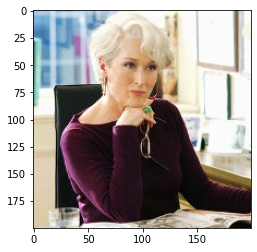

Character: Miranda Priestly


KeyboardInterrupt: Interrupted by user

In [9]:
try:
    rating_df = pd.read_csv('labels' + str(rater) + ".csv", index_col=0)
    print("Previous attempt found. Continuing.")
except:
    print("No previous attempt found. Starting.")
    rating_df = pd.DataFrame(image_key[int(rater)], columns = ['characterName', 'imageFile'])
    rating_df['gender'] = np.nan
    rating_df['race'] = np.nan
for i in rating_df[rating_df['gender'].isna()].index:
    image = Image.open('data/images/' + rating_df.loc[i, 'imageFile'])
    plt.imshow(image)
    plt.show()
    print("Character:", rating_df.loc[i, 'characterName'])
    gender = input("Male (M), Female (F), or Unknown (U)\n?")
    while gender not in (['M', 'F', 'U', 'm', 'f', 'u']):
        print("Invalid gender.")
        gender = input("Male (M), Female (F), or Unknown (U)\n?")
    clear_output()
    plt.imshow(image)
    plt.show()
    print("Character:", rating_df.loc[i, 'characterName'])
    race = input("White(W)\nBlack(B)\nHispanic(H)\nAsian(A)\nIndian(I)\nMideast(M)\nNative American(N)\nUnknown(U)?\n")
    while race not in (['W', 'B', 'H', 'A', 'I', 'M', 'N', 'U', 'w', 'b', 'h', 'a', 'i', 'm' 'n', 'u']):
        print("Invalid race.")
        race = input("White(W)\nBlack(B)\nHispanic(H)\nAsian(A)\nIndian(I)\nMideast(M)\nNative American(N)\nUnknown(U)?\n")
    clear_output(wait=True)
    rating_df.loc[i, 'gender'] = gender.upper()
    rating_df.loc[i, 'race'] = race.upper()
    rating_df.to_csv("labels" + str(rater) + ".csv")

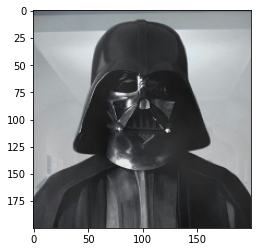

1600


In [16]:
counter = 0
for rater in range(0,4):
    rating_df = pd.DataFrame(image_key[int(rater)], columns = ['characterName', 'imageFile'])
    for i in rating_df.index:
        image = Image.open('data/images/' + rating_df.loc[i, 'imageFile'])
        clear_output(wait=True)
        plt.imshow(image)
        plt.show()
        counter += 1
        print(counter)